In [1]:
#pip install opencv-python librosa numpy==2.0.0

In [2]:
import numpy as np
import cv2
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

def generate_shapes(size=256):
    # Create a blank image
    img = np.zeros((size, size), dtype=np.uint8)
    
    # Draw a rectangle
    cv2.rectangle(img, (30, 30), (100, 100), 255, -1)
    
    # Draw a circle
    cv2.circle(img, (180, 80), 40, 255, -1)
    
    # Draw a line
    cv2.line(img, (50, 200), (200, 220), 255, 3)
    
    # Save the image
    cv2.imwrite('shapes.png', img)

def generate_beep(fs=44100):
    # Generate a single beep
    t_beep = np.linspace(0, 0.2, int(fs * 0.2), endpoint=False)
    beep = 0.5 * np.sin(2 * np.pi * 1000 * t_beep)
    
    # Generate silence
    silence = np.zeros(int(fs * 0.2))
    
    # Create a repeated beep pattern
    signal = np.tile(np.concatenate((beep, silence)), 10)
    
    # Save the audio file
    write('beep_pattern.wav', fs, (signal * 32767).astype(np.int16))

generate_beep()
generate_shapes()



# Grayscale image and Compute its 2d Fourier Transform

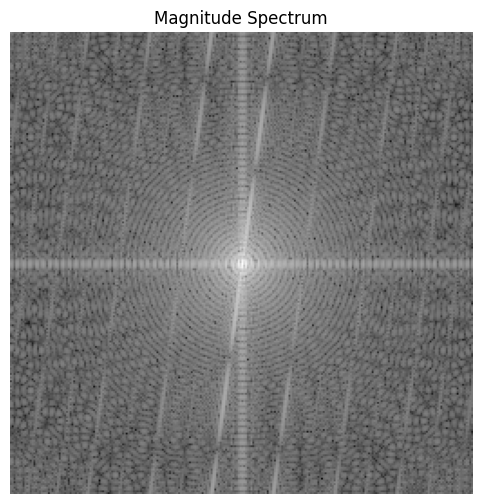

In [3]:
image = cv2.imread('shapes.png', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

# Apply a Low-Pass and High-Pass Filter in the Frequency Domain


In [4]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask_lp = np.zeros((rows, cols), np.uint8)
r = 50

cv2.circle(mask_lp, (ccol, crow), r, 1, thickness=-1)

mask_hp = 1 - mask_lp
fshift_lp = fshift * mask_lp
fshift_hp = fshift * mask_hp

# Reconstruct the Image from the Filtered Spectrum


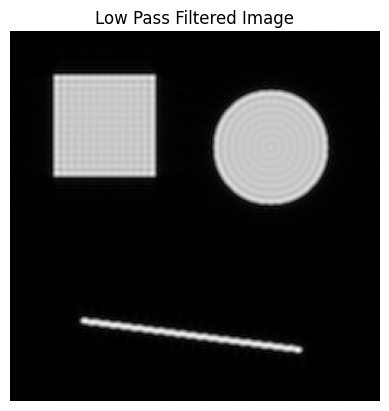

In [5]:
f_ishift_lp = np.fft.ifftshift(fshift_lp)
img_back_lp = np.fft.ifft2(f_ishift_lp)
img_back_lp = np.abs(img_back_lp)

plt.imshow(img_back_lp, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.axis('off')
plt.show()

# Load an Audio Signal and Compute its Spectrogram


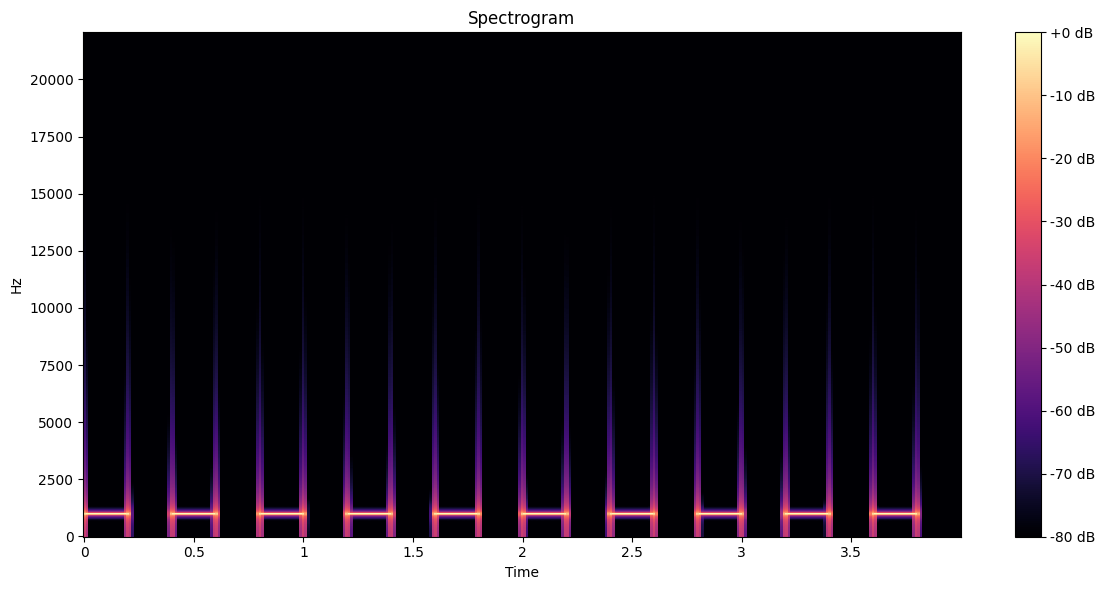

In [7]:
import librosa
import librosa.display

y, sr = librosa.load('beep_pattern.wav', sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# Compare Time-Domain and Frequency-Domain Representations

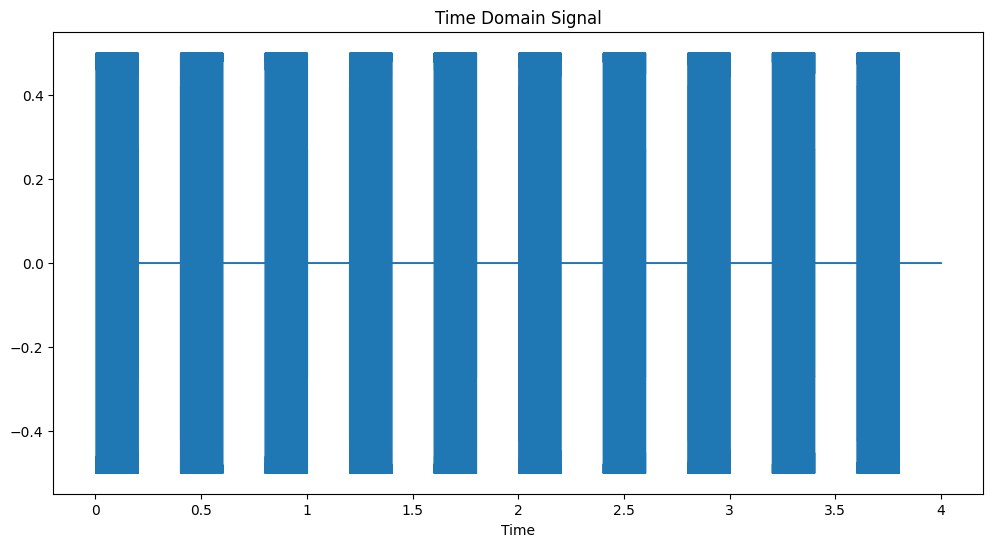

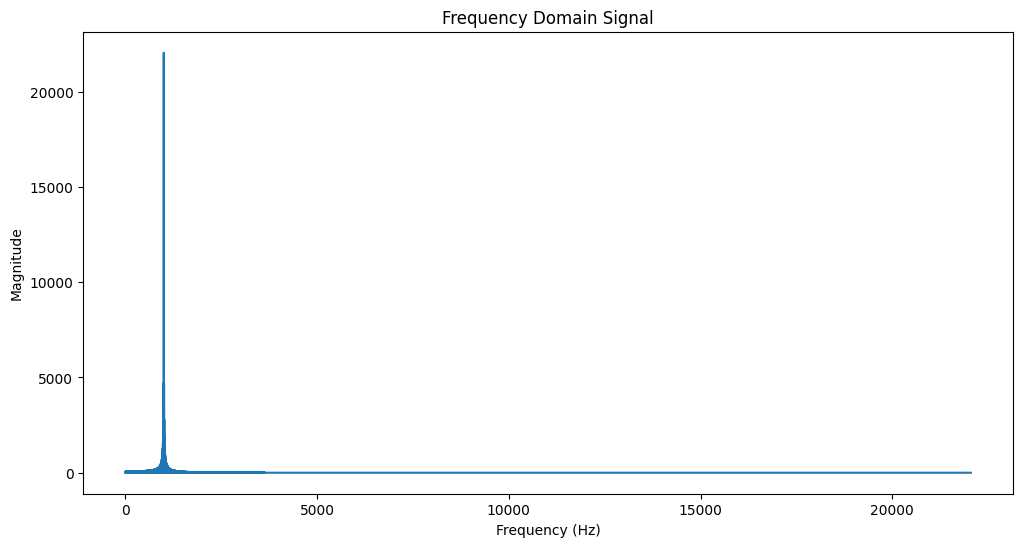

In [8]:
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Time Domain Signal')

Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Y), 1/sr)
plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()